# Stations vs IMERG Observation 데이터 분석

## 1.  [GPM관측 데이터 - 지상관측] DataFrame 생성

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 지상관측과 GPM 데이터 원본자료 불러오기
raw_hourly_df = pd.read_csv("sj_hourly_rainfall_case1.csv")
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# 지상관측 컬럼 추출
obs_cols = raw_hourly_df.columns[1:13]
obs_cols

Index(['4001430', '4001440', '4001450', '4003420', '4007450', '4007470',
       '4007472', '4007474', '4009460', '9000140', '9000233', '9000234'],
      dtype='object')

In [3]:
# GPM 데이터 컬럼 추출
gpm_cols = raw_hourly_df.columns[13:]
gpm_cols

Index(['4001430_gpm', '4001440_gpm', '4001450_gpm', '4003420_gpm',
       '4007450_gpm', '4007470_gpm', '4007472_gpm', '4007474_gpm',
       '4009460_gpm', '9000140_gpm', '9000233_gpm', '9000234_gpm'],
      dtype='object')

In [4]:
# 관측데이터의 날짜만 있는 Pandas DataFrame 생성
obs_gpm_diff_df = pd.DataFrame(index=raw_hourly_df.date)
obs_gpm_diff_df

""
date
2014-10-01 01:00:00
2014-10-01 02:00:00
2014-10-01 03:00:00
2014-10-01 04:00:00
2014-10-01 05:00:00
...
2021-09-30 20:00:00
2021-09-30 21:00:00
2021-09-30 22:00:00


In [5]:
# [GPM관측 데이터 - 지상관측]를 관측값 코드컬럼에 값으로 넣기
for obs_col, gpm_col in zip(obs_cols, gpm_cols):
    diff = raw_hourly_df[gpm_col] - raw_hourly_df[obs_col]
    obs_gpm_diff_df[obs_col+"_diff"] = diff.values

In [6]:
# 최종 [GPM관측 데이터 - 지상관측] Pandas DataFrame 확인
obs_gpm_diff_df

,4001430_diff,4001440_diff,4001450_diff,4003420_diff,4007450_diff,4007470_diff,4007472_diff,4007474_diff,4009460_diff,9000140_diff,9000233_diff,9000234_diff
date,,,,,,,,,,,,
2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 04:00:00,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 각 관측소별 통계 특성값 확인
obs_gpm_diff_df.describe().applymap('{:,.2f}'.format)

,4001430_diff,4001440_diff,4001450_diff,4003420_diff,4007450_diff,4007470_diff,4007472_diff,4007474_diff,4009460_diff,9000140_diff,9000233_diff,9000234_diff
count,"61,368.00","61,368.00","61,368.00","61,368.00","61,368.00","61,368.00","61,368.00","61,368.00","61,368.00","61,368.00","61,368.00","61,368.00"
mean,0.02,0.01,-0.00,0.03,0.01,0.01,0.02,-0.00,0.02,0.01,0.00,0.01
std,1.15,1.13,1.22,1.02,1.18,1.19,1.13,1.24,1.15,1.17,1.19,1.24
min,-45.35,-60.45,-67.15,-55.55,-83.25,-42.35,-62.80,-56.90,-71.90,-41.95,-51.55,-66.80
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,66.75,49.95,35.20,43.10,35.10,42.10,39.95,49.00,32.15,38.65,45.05,30.10


## 2.  관측소별 [GPM관측 데이터 - 지상관측] 의 특성 분석

### 2.1 "4001430" 강우관측소

In [8]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(10,8)})

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

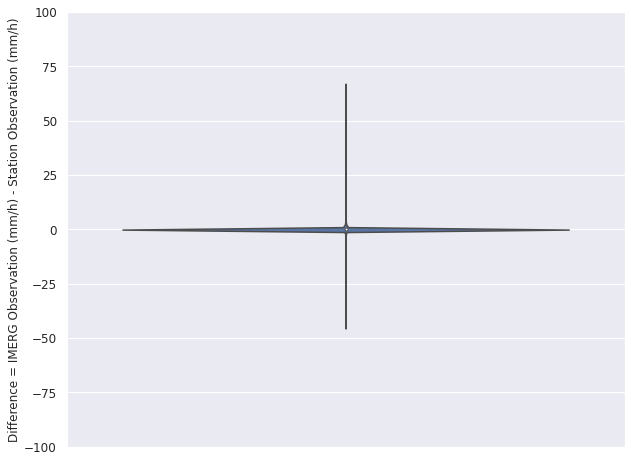

In [9]:
st_code = obs_gpm_diff_df.columns[0]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [10]:
bins = list(range(-50, 100, 10))
bins

[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [11]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-50.001, -40.0]        3
 (-40.0, -30.0]          4
 (-30.0, -20.0]         20
 (-20.0, -10.0]         74
 (-10.0, 0.0]        54550
 (0.0, 10.0]          6673
 (10.0, 20.0]           38
 (20.0, 30.0]            1
 (30.0, 40.0]            2
 (40.0, 50.0]            1
 (50.0, 60.0]            1
 (60.0, 70.0]            1
 (70.0, 80.0]            0
 (80.0, 90.0]            0
 Name: 4001430_diff, dtype: int64,
 (-50.001, -40.0]    0.000049
 (-40.0, -30.0]      0.000065
 (-30.0, -20.0]      0.000326
 (-20.0, -10.0]      0.001206
 (-10.0, 0.0]        0.888900
 (0.0, 10.0]         0.108737
 (10.0, 20.0]        0.000619
 (20.0, 30.0]        0.000016
 (30.0, 40.0]        0.000033
 (40.0, 50.0]        0.000016
 (50.0, 60.0]        0.000016
 (60.0, 70.0]        0.000016
 (70.0, 80.0]        0.000000
 (80.0, 90.0]        0.000000
 Name: 4001430_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [12]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       12
 (-9.0, -8.0]          23
 (-8.0, -7.0]          20
 (-7.0, -6.0]          21
 (-6.0, -5.0]          33
 (-5.0, -4.0]          52
 (-4.0, -3.0]         118
 (-3.0, -2.0]         255
 (-2.0, -1.0]         982
 (-1.0, 0.0]        53035
 (0.0, 1.0]          5143
 (1.0, 2.0]           804
 (2.0, 3.0]           333
 (3.0, 4.0]           160
 (4.0, 5.0]            83
 (5.0, 6.0]            56
 (6.0, 7.0]            38
 (7.0, 8.0]            24
 (8.0, 9.0]            21
 (9.0, 10.0]           11
 Name: 4001430_diff, dtype: int64,
 (-10.001, -9.0]    0.000196
 (-9.0, -8.0]       0.000375
 (-8.0, -7.0]       0.000326
 (-7.0, -6.0]       0.000342
 (-6.0, -5.0]       0.000538
 (-5.0, -4.0]       0.000847
 (-4.0, -3.0]       0.001923
 (-3.0, -2.0]       0.004155
 (-2.0, -1.0]       0.016002
 (-1.0, 0.0]        0.864213
 (0.0, 1.0]         0.083806
 (1.0, 2.0]         0.013101
 (2.0, 3.0]         0.005426
 (3.0, 4.0]         0.002607
 (4.0, 5.0]         0.001352
 (5.0, 6.0

<AxesSubplot:>

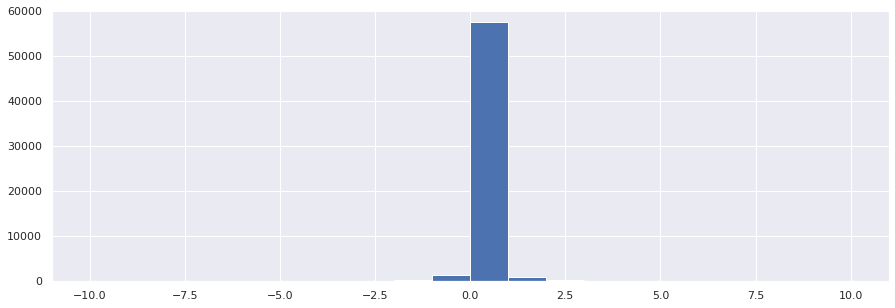

In [14]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.2 "4001440" 강우관측소 (Done)

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

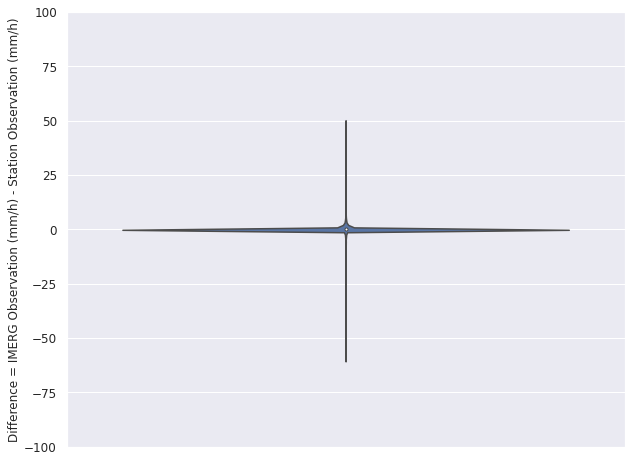

In [15]:
st_code = obs_gpm_diff_df.columns[1]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [16]:
bins = list(range(-50, 120, 10))
bins

[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [17]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-50.001, -40.0]        2
 (-40.0, -30.0]          3
 (-30.0, -20.0]         12
 (-20.0, -10.0]         56
 (-10.0, 0.0]        54752
 (0.0, 10.0]          6498
 (10.0, 20.0]           37
 (20.0, 30.0]            2
 (30.0, 40.0]            0
 (40.0, 50.0]            2
 (50.0, 60.0]            0
 (60.0, 70.0]            0
 (70.0, 80.0]            0
 (80.0, 90.0]            0
 (90.0, 100.0]           0
 (100.0, 110.0]          0
 Name: 4001440_diff, dtype: int64,
 (-50.001, -40.0]    0.000033
 (-40.0, -30.0]      0.000049
 (-30.0, -20.0]      0.000196
 (-20.0, -10.0]      0.000913
 (-10.0, 0.0]        0.892191
 (0.0, 10.0]         0.105886
 (10.0, 20.0]        0.000603
 (20.0, 30.0]        0.000033
 (30.0, 40.0]        0.000000
 (40.0, 50.0]        0.000033
 (50.0, 60.0]        0.000000
 (60.0, 70.0]        0.000000
 (70.0, 80.0]        0.000000
 (80.0, 90.0]        0.000000
 (90.0, 100.0]       0.000000
 (100.0, 110.0]      0.000000
 Name: 4001440_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [18]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       14
 (-9.0, -8.0]          21
 (-8.0, -7.0]          27
 (-7.0, -6.0]          30
 (-6.0, -5.0]          44
 (-5.0, -4.0]          56
 (-4.0, -3.0]         142
 (-3.0, -2.0]         266
 (-2.0, -1.0]        1198
 (-1.0, 0.0]        52957
 (0.0, 1.0]          4903
 (1.0, 2.0]           794
 (2.0, 3.0]           383
 (3.0, 4.0]           163
 (4.0, 5.0]            99
 (5.0, 6.0]            53
 (6.0, 7.0]            40
 (7.0, 8.0]            33
 (8.0, 9.0]            14
 (9.0, 10.0]           16
 Name: 4001440_diff, dtype: int64,
 (-10.001, -9.0]    0.000228
 (-9.0, -8.0]       0.000342
 (-8.0, -7.0]       0.000440
 (-7.0, -6.0]       0.000489
 (-6.0, -5.0]       0.000717
 (-5.0, -4.0]       0.000913
 (-4.0, -3.0]       0.002314
 (-3.0, -2.0]       0.004335
 (-2.0, -1.0]       0.019522
 (-1.0, 0.0]        0.862942
 (0.0, 1.0]         0.079895
 (1.0, 2.0]         0.012938
 (2.0, 3.0]         0.006241
 (3.0, 4.0]         0.002656
 (4.0, 5.0]         0.001613
 (5.0, 6.0

<AxesSubplot:>

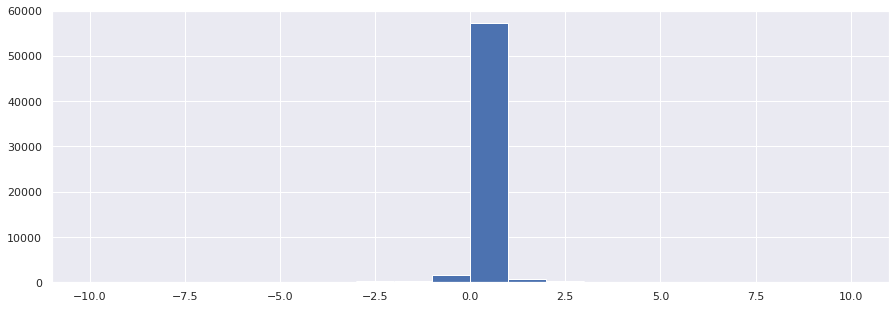

In [20]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.3 "4001450" 강우관측소 (Done)

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

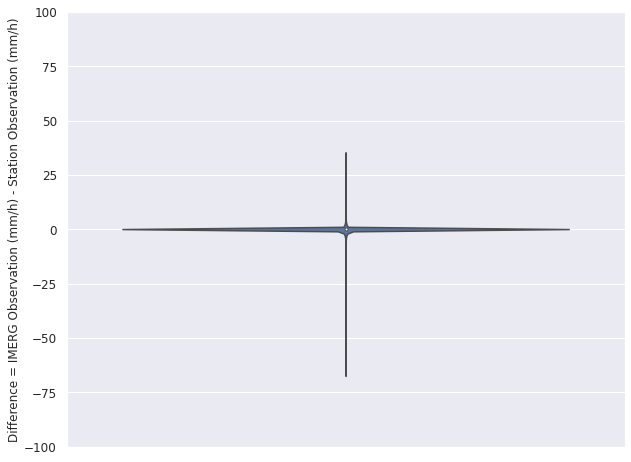

In [21]:
st_code = obs_gpm_diff_df.columns[2]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [22]:
bins = list(range(-70, 50, 10))
bins

[-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]

In [23]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-70.001, -60.0]        2
 (-60.0, -50.0]          1
 (-50.0, -40.0]          4
 (-40.0, -30.0]          2
 (-30.0, -20.0]         20
 (-20.0, -10.0]         77
 (-10.0, 0.0]        55274
 (0.0, 10.0]          5933
 (10.0, 20.0]           48
 (20.0, 30.0]            6
 (30.0, 40.0]            1
 Name: 4001450_diff, dtype: int64,
 (-70.001, -60.0]    0.000033
 (-60.0, -50.0]      0.000016
 (-50.0, -40.0]      0.000065
 (-40.0, -30.0]      0.000033
 (-30.0, -20.0]      0.000326
 (-20.0, -10.0]      0.001255
 (-10.0, 0.0]        0.900697
 (0.0, 10.0]         0.096679
 (10.0, 20.0]        0.000782
 (20.0, 30.0]        0.000098
 (30.0, 40.0]        0.000016
 Name: 4001450_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [24]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       17
 (-9.0, -8.0]          18
 (-8.0, -7.0]          18
 (-7.0, -6.0]          47
 (-6.0, -5.0]          52
 (-5.0, -4.0]          82
 (-4.0, -3.0]         157
 (-3.0, -2.0]         355
 (-2.0, -1.0]        1428
 (-1.0, 0.0]        53103
 (0.0, 1.0]          4368
 (1.0, 2.0]           744
 (2.0, 3.0]           343
 (3.0, 4.0]           203
 (4.0, 5.0]           116
 (5.0, 6.0]            63
 (6.0, 7.0]            34
 (7.0, 8.0]            24
 (8.0, 9.0]            26
 (9.0, 10.0]           12
 Name: 4001450_diff, dtype: int64,
 (-10.001, -9.0]    0.000277
 (-9.0, -8.0]       0.000293
 (-8.0, -7.0]       0.000293
 (-7.0, -6.0]       0.000766
 (-6.0, -5.0]       0.000847
 (-5.0, -4.0]       0.001336
 (-4.0, -3.0]       0.002558
 (-3.0, -2.0]       0.005785
 (-2.0, -1.0]       0.023269
 (-1.0, 0.0]        0.865321
 (0.0, 1.0]         0.071177
 (1.0, 2.0]         0.012124
 (2.0, 3.0]         0.005589
 (3.0, 4.0]         0.003308
 (4.0, 5.0]         0.001890
 (5.0, 6.0

<AxesSubplot:>

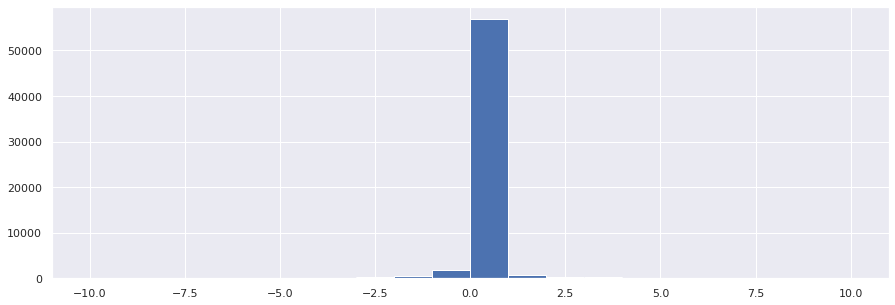

In [26]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.4 "4003420" 강우관측소 (Done)

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

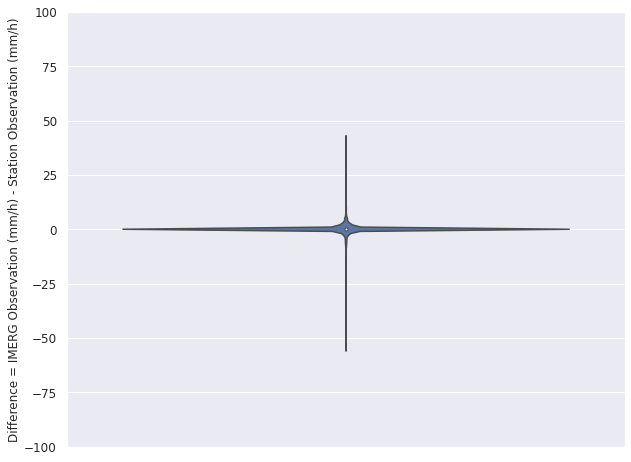

In [27]:
st_code = obs_gpm_diff_df.columns[3]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [28]:
bins = list(range(-50, 70, 10))
bins

[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]

In [29]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-50.001, -40.0]        1
 (-40.0, -30.0]          0
 (-30.0, -20.0]         11
 (-20.0, -10.0]         57
 (-10.0, 0.0]        54712
 (0.0, 10.0]          6532
 (10.0, 20.0]           47
 (20.0, 30.0]            5
 (30.0, 40.0]            1
 (40.0, 50.0]            1
 (50.0, 60.0]            0
 Name: 4003420_diff, dtype: int64,
 (-50.001, -40.0]    0.000016
 (-40.0, -30.0]      0.000000
 (-30.0, -20.0]      0.000179
 (-20.0, -10.0]      0.000929
 (-10.0, 0.0]        0.891540
 (0.0, 10.0]         0.106440
 (10.0, 20.0]        0.000766
 (20.0, 30.0]        0.000081
 (30.0, 40.0]        0.000016
 (40.0, 50.0]        0.000016
 (50.0, 60.0]        0.000000
 Name: 4003420_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [30]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       13
 (-9.0, -8.0]          17
 (-8.0, -7.0]          22
 (-7.0, -6.0]          34
 (-6.0, -5.0]          42
 (-5.0, -4.0]          75
 (-4.0, -3.0]         102
 (-3.0, -2.0]         244
 (-2.0, -1.0]        1044
 (-1.0, 0.0]        53119
 (0.0, 1.0]          4962
 (1.0, 2.0]           793
 (2.0, 3.0]           354
 (3.0, 4.0]           170
 (4.0, 5.0]           100
 (5.0, 6.0]            71
 (6.0, 7.0]            39
 (7.0, 8.0]            19
 (8.0, 9.0]            12
 (9.0, 10.0]           12
 Name: 4003420_diff, dtype: int64,
 (-10.001, -9.0]    0.000212
 (-9.0, -8.0]       0.000277
 (-8.0, -7.0]       0.000358
 (-7.0, -6.0]       0.000554
 (-6.0, -5.0]       0.000684
 (-5.0, -4.0]       0.001222
 (-4.0, -3.0]       0.001662
 (-3.0, -2.0]       0.003976
 (-2.0, -1.0]       0.017012
 (-1.0, 0.0]        0.865581
 (0.0, 1.0]         0.080856
 (1.0, 2.0]         0.012922
 (2.0, 3.0]         0.005768
 (3.0, 4.0]         0.002770
 (4.0, 5.0]         0.001630
 (5.0, 6.0

<AxesSubplot:>

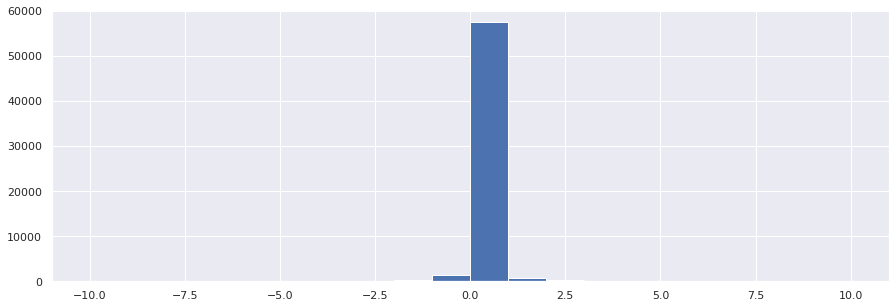

In [32]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.5 "4007450" 강우관측소 (Done)

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

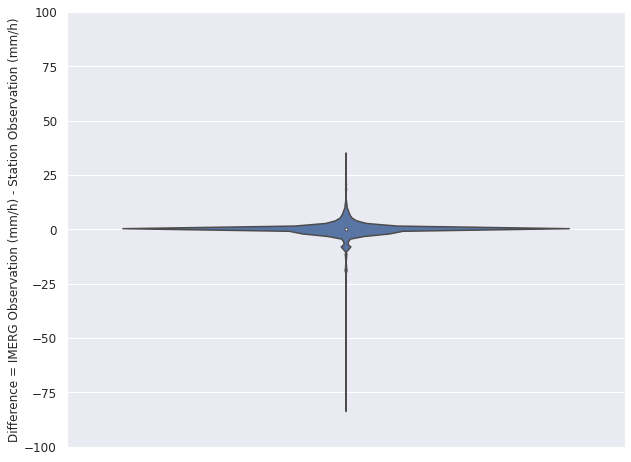

In [33]:
st_code = obs_gpm_diff_df.columns[4]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [34]:
bins = list(range(-90, 60, 10))
bins

[-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50]

In [35]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-90.001, -80.0]        1
 (-80.0, -70.0]          0
 (-70.0, -60.0]          0
 (-60.0, -50.0]          0
 (-50.0, -40.0]          2
 (-40.0, -30.0]          6
 (-30.0, -20.0]         16
 (-20.0, -10.0]         62
 (-10.0, 0.0]        55672
 (0.0, 10.0]          5559
 (10.0, 20.0]           41
 (20.0, 30.0]            8
 (30.0, 40.0]            1
 (40.0, 50.0]            0
 Name: 4007450_diff, dtype: int64,
 (-90.001, -80.0]    0.000016
 (-80.0, -70.0]      0.000000
 (-70.0, -60.0]      0.000000
 (-60.0, -50.0]      0.000000
 (-50.0, -40.0]      0.000033
 (-40.0, -30.0]      0.000098
 (-30.0, -20.0]      0.000261
 (-20.0, -10.0]      0.001010
 (-10.0, 0.0]        0.907183
 (0.0, 10.0]         0.090585
 (10.0, 20.0]        0.000668
 (20.0, 30.0]        0.000130
 (30.0, 40.0]        0.000016
 (40.0, 50.0]        0.000000
 Name: 4007450_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [36]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [37]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       23
 (-9.0, -8.0]          32
 (-8.0, -7.0]          29
 (-7.0, -6.0]          37
 (-6.0, -5.0]          60
 (-5.0, -4.0]          76
 (-4.0, -3.0]         115
 (-3.0, -2.0]         271
 (-2.0, -1.0]         932
 (-1.0, 0.0]        54099
 (0.0, 1.0]          3983
 (1.0, 2.0]           763
 (2.0, 3.0]           349
 (3.0, 4.0]           174
 (4.0, 5.0]           103
 (5.0, 6.0]            59
 (6.0, 7.0]            47
 (7.0, 8.0]            41
 (8.0, 9.0]            24
 (9.0, 10.0]           16
 Name: 4007450_diff, dtype: int64,
 (-10.001, -9.0]    0.000375
 (-9.0, -8.0]       0.000521
 (-8.0, -7.0]       0.000473
 (-7.0, -6.0]       0.000603
 (-6.0, -5.0]       0.000978
 (-5.0, -4.0]       0.001238
 (-4.0, -3.0]       0.001874
 (-3.0, -2.0]       0.004416
 (-2.0, -1.0]       0.015187
 (-1.0, 0.0]        0.881551
 (0.0, 1.0]         0.064904
 (1.0, 2.0]         0.012433
 (2.0, 3.0]         0.005687
 (3.0, 4.0]         0.002835
 (4.0, 5.0]         0.001678
 (5.0, 6.0

<AxesSubplot:>

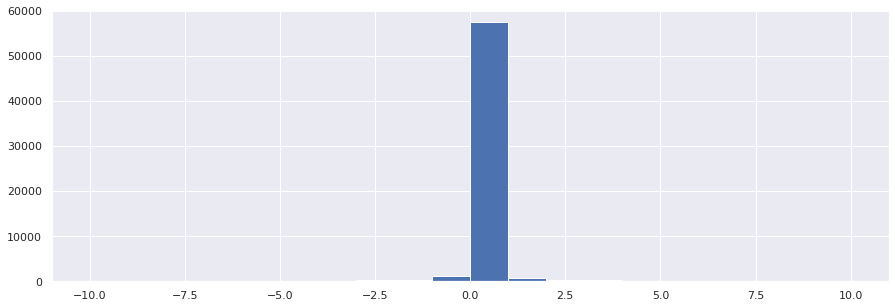

In [38]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.6 "4007470" 강우관측소

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

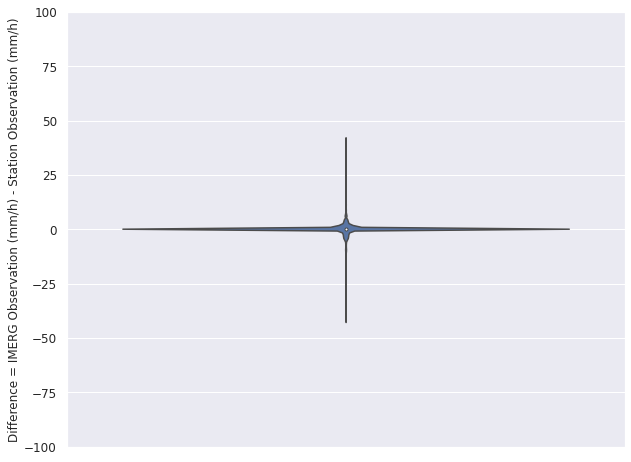

In [39]:
st_code = obs_gpm_diff_df.columns[5]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [40]:
bins = list(range(-50, 50, 10))
bins

[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40]

In [41]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-50.001, -40.0]        4
 (-40.0, -30.0]          8
 (-30.0, -20.0]         14
 (-20.0, -10.0]         76
 (-10.0, 0.0]        55669
 (0.0, 10.0]          5545
 (10.0, 20.0]           41
 (20.0, 30.0]            7
 (30.0, 40.0]            3
 Name: 4007470_diff, dtype: int64,
 (-50.001, -40.0]    0.000065
 (-40.0, -30.0]      0.000130
 (-30.0, -20.0]      0.000228
 (-20.0, -10.0]      0.001238
 (-10.0, 0.0]        0.907134
 (0.0, 10.0]         0.090357
 (10.0, 20.0]        0.000668
 (20.0, 30.0]        0.000114
 (30.0, 40.0]        0.000049
 Name: 4007470_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [42]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [43]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       28
 (-9.0, -8.0]          28
 (-8.0, -7.0]          32
 (-7.0, -6.0]          31
 (-6.0, -5.0]          46
 (-5.0, -4.0]         103
 (-4.0, -3.0]         124
 (-3.0, -2.0]         270
 (-2.0, -1.0]         917
 (-1.0, 0.0]        54095
 (0.0, 1.0]          4013
 (1.0, 2.0]           781
 (2.0, 3.0]           311
 (3.0, 4.0]           162
 (4.0, 5.0]           118
 (5.0, 6.0]            45
 (6.0, 7.0]            54
 (7.0, 8.0]            29
 (8.0, 9.0]            18
 (9.0, 10.0]           14
 Name: 4007470_diff, dtype: int64,
 (-10.001, -9.0]    0.000456
 (-9.0, -8.0]       0.000456
 (-8.0, -7.0]       0.000521
 (-7.0, -6.0]       0.000505
 (-6.0, -5.0]       0.000750
 (-5.0, -4.0]       0.001678
 (-4.0, -3.0]       0.002021
 (-3.0, -2.0]       0.004400
 (-2.0, -1.0]       0.014943
 (-1.0, 0.0]        0.881485
 (0.0, 1.0]         0.065392
 (1.0, 2.0]         0.012727
 (2.0, 3.0]         0.005068
 (3.0, 4.0]         0.002640
 (4.0, 5.0]         0.001923
 (5.0, 6.0

<AxesSubplot:>

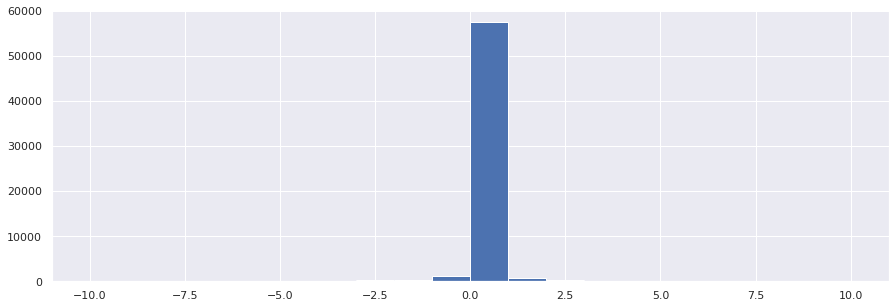

In [44]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.7 "4007472" 강우관측소 (Done)

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

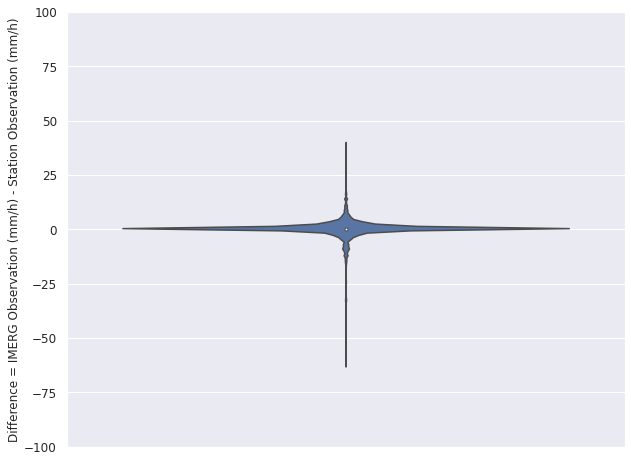

In [45]:
st_code = obs_gpm_diff_df.columns[6]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [46]:
bins = list(range(-70, 50, 10))
bins

[-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]

In [47]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-70.001, -60.0]        1
 (-60.0, -50.0]          1
 (-50.0, -40.0]          0
 (-40.0, -30.0]          4
 (-30.0, -20.0]         11
 (-20.0, -10.0]         71
 (-10.0, 0.0]        55621
 (0.0, 10.0]          5603
 (10.0, 20.0]           46
 (20.0, 30.0]            8
 (30.0, 40.0]            2
 Name: 4007472_diff, dtype: int64,
 (-70.001, -60.0]    0.000016
 (-60.0, -50.0]      0.000016
 (-50.0, -40.0]      0.000000
 (-40.0, -30.0]      0.000065
 (-30.0, -20.0]      0.000179
 (-20.0, -10.0]      0.001157
 (-10.0, 0.0]        0.906352
 (0.0, 10.0]         0.091302
 (10.0, 20.0]        0.000750
 (20.0, 30.0]        0.000130
 (30.0, 40.0]        0.000033
 Name: 4007472_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [48]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [49]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       28
 (-9.0, -8.0]          24
 (-8.0, -7.0]          24
 (-7.0, -6.0]          31
 (-6.0, -5.0]          46
 (-5.0, -4.0]          90
 (-4.0, -3.0]         101
 (-3.0, -2.0]         256
 (-2.0, -1.0]         968
 (-1.0, 0.0]        54056
 (0.0, 1.0]          3996
 (1.0, 2.0]           805
 (2.0, 3.0]           347
 (3.0, 4.0]           190
 (4.0, 5.0]            93
 (5.0, 6.0]            58
 (6.0, 7.0]            49
 (7.0, 8.0]            25
 (8.0, 9.0]            18
 (9.0, 10.0]           22
 Name: 4007472_diff, dtype: int64,
 (-10.001, -9.0]    0.000456
 (-9.0, -8.0]       0.000391
 (-8.0, -7.0]       0.000391
 (-7.0, -6.0]       0.000505
 (-6.0, -5.0]       0.000750
 (-5.0, -4.0]       0.001467
 (-4.0, -3.0]       0.001646
 (-3.0, -2.0]       0.004172
 (-2.0, -1.0]       0.015774
 (-1.0, 0.0]        0.880850
 (0.0, 1.0]         0.065115
 (1.0, 2.0]         0.013118
 (2.0, 3.0]         0.005654
 (3.0, 4.0]         0.003096
 (4.0, 5.0]         0.001515
 (5.0, 6.0

<AxesSubplot:>

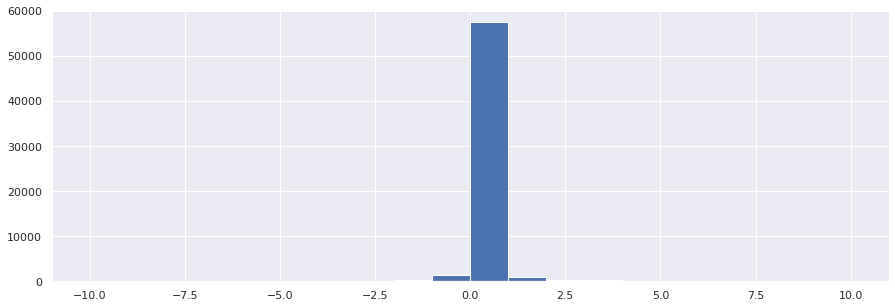

In [50]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.8 "4007474" 강우관측소

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

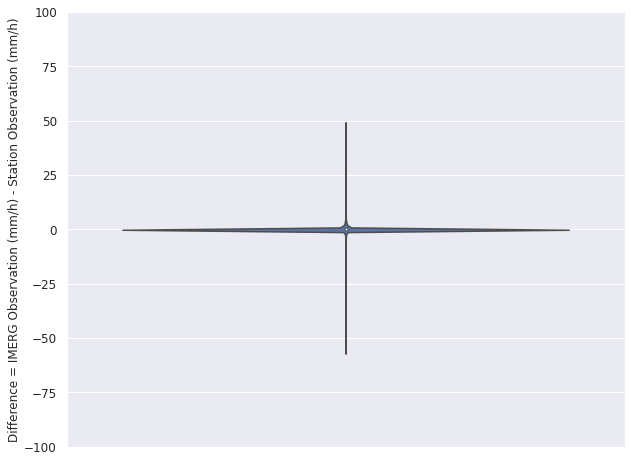

In [51]:
st_code = obs_gpm_diff_df.columns[7]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [52]:
bins = list(range(-60, 60, 10))
bins

[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50]

In [53]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-60.001, -50.0]        1
 (-50.0, -40.0]          2
 (-40.0, -30.0]          8
 (-30.0, -20.0]         23
 (-20.0, -10.0]         75
 (-10.0, 0.0]        55274
 (0.0, 10.0]          5927
 (10.0, 20.0]           45
 (20.0, 30.0]            8
 (30.0, 40.0]            4
 (40.0, 50.0]            1
 Name: 4007474_diff, dtype: int64,
 (-60.001, -50.0]    0.000016
 (-50.0, -40.0]      0.000033
 (-40.0, -30.0]      0.000130
 (-30.0, -20.0]      0.000375
 (-20.0, -10.0]      0.001222
 (-10.0, 0.0]        0.900697
 (0.0, 10.0]         0.096581
 (10.0, 20.0]        0.000733
 (20.0, 30.0]        0.000130
 (30.0, 40.0]        0.000065
 (40.0, 50.0]        0.000016
 Name: 4007474_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [54]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [55]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       21
 (-9.0, -8.0]          22
 (-8.0, -7.0]          45
 (-7.0, -6.0]          35
 (-6.0, -5.0]          59
 (-5.0, -4.0]          82
 (-4.0, -3.0]         147
 (-3.0, -2.0]         301
 (-2.0, -1.0]        1067
 (-1.0, 0.0]        53496
 (0.0, 1.0]          4403
 (1.0, 2.0]           761
 (2.0, 3.0]           339
 (3.0, 4.0]           163
 (4.0, 5.0]           102
 (5.0, 6.0]            57
 (6.0, 7.0]            48
 (7.0, 8.0]            30
 (8.0, 9.0]            10
 (9.0, 10.0]           14
 Name: 4007474_diff, dtype: int64,
 (-10.001, -9.0]    0.000342
 (-9.0, -8.0]       0.000358
 (-8.0, -7.0]       0.000733
 (-7.0, -6.0]       0.000570
 (-6.0, -5.0]       0.000961
 (-5.0, -4.0]       0.001336
 (-4.0, -3.0]       0.002395
 (-3.0, -2.0]       0.004905
 (-2.0, -1.0]       0.017387
 (-1.0, 0.0]        0.871725
 (0.0, 1.0]         0.071747
 (1.0, 2.0]         0.012401
 (2.0, 3.0]         0.005524
 (3.0, 4.0]         0.002656
 (4.0, 5.0]         0.001662
 (5.0, 6.0

<AxesSubplot:>

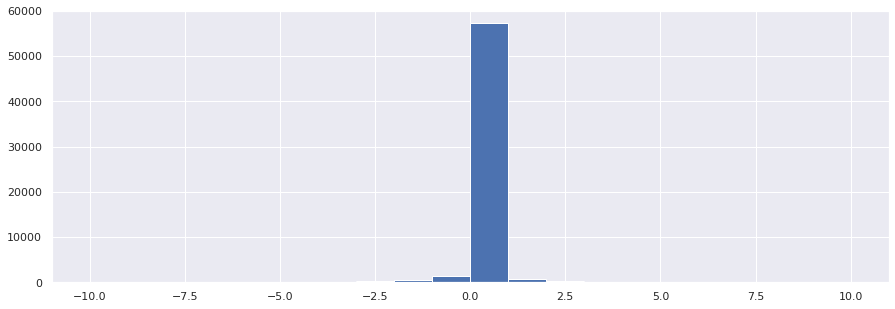

In [56]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.9 "4009460" 강우관측소

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

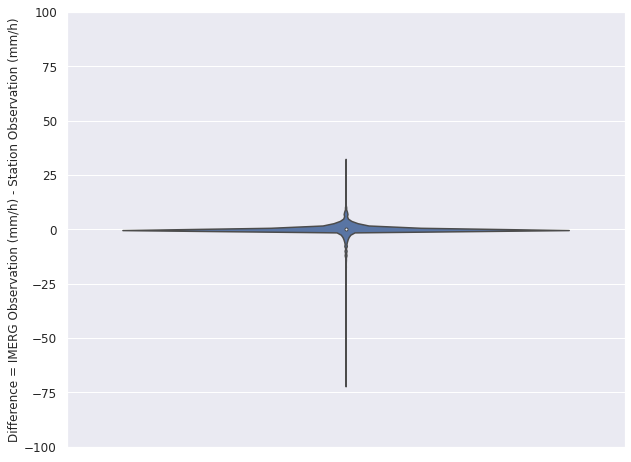

In [57]:
st_code = obs_gpm_diff_df.columns[8]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [58]:
bins = list(range(-70, 50, 10))
bins

[-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]

In [59]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-70.001, -60.0]        0
 (-60.0, -50.0]          1
 (-50.0, -40.0]          1
 (-40.0, -30.0]          4
 (-30.0, -20.0]         16
 (-20.0, -10.0]         78
 (-10.0, 0.0]        55651
 (0.0, 10.0]          5568
 (10.0, 20.0]           38
 (20.0, 30.0]            8
 (30.0, 40.0]            2
 Name: 4009460_diff, dtype: int64,
 (-70.001, -60.0]    0.000000
 (-60.0, -50.0]      0.000016
 (-50.0, -40.0]      0.000016
 (-40.0, -30.0]      0.000065
 (-30.0, -20.0]      0.000261
 (-20.0, -10.0]      0.001271
 (-10.0, 0.0]        0.906841
 (0.0, 10.0]         0.090731
 (10.0, 20.0]        0.000619
 (20.0, 30.0]        0.000130
 (30.0, 40.0]        0.000033
 Name: 4009460_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [60]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [61]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       19
 (-9.0, -8.0]          11
 (-8.0, -7.0]          32
 (-7.0, -6.0]          24
 (-6.0, -5.0]          46
 (-5.0, -4.0]          95
 (-4.0, -3.0]         115
 (-3.0, -2.0]         229
 (-2.0, -1.0]         843
 (-1.0, 0.0]        54240
 (0.0, 1.0]          3998
 (1.0, 2.0]           740
 (2.0, 3.0]           375
 (3.0, 4.0]           183
 (4.0, 5.0]           101
 (5.0, 6.0]            59
 (6.0, 7.0]            42
 (7.0, 8.0]            32
 (8.0, 9.0]            25
 (9.0, 10.0]           13
 Name: 4009460_diff, dtype: int64,
 (-10.001, -9.0]    0.000310
 (-9.0, -8.0]       0.000179
 (-8.0, -7.0]       0.000521
 (-7.0, -6.0]       0.000391
 (-6.0, -5.0]       0.000750
 (-5.0, -4.0]       0.001548
 (-4.0, -3.0]       0.001874
 (-3.0, -2.0]       0.003732
 (-2.0, -1.0]       0.013737
 (-1.0, 0.0]        0.883848
 (0.0, 1.0]         0.065148
 (1.0, 2.0]         0.012058
 (2.0, 3.0]         0.006111
 (3.0, 4.0]         0.002982
 (4.0, 5.0]         0.001646
 (5.0, 6.0

<AxesSubplot:>

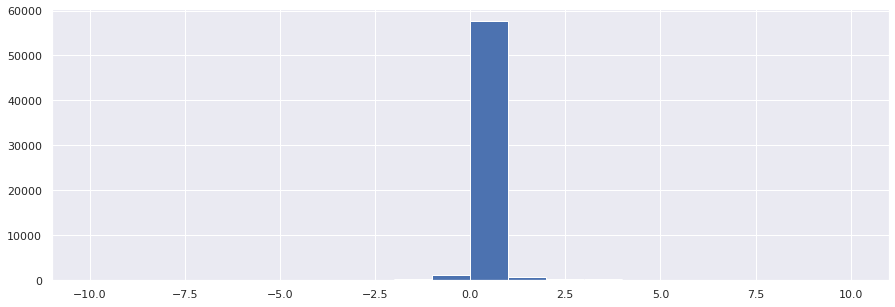

In [62]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.10 "9000140" 강우관측소

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

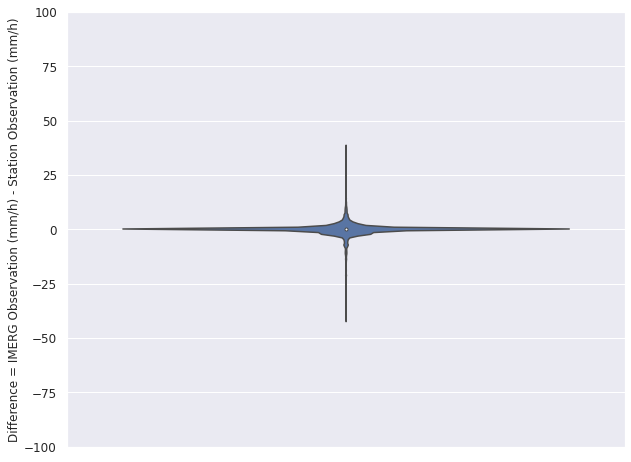

In [63]:
st_code = obs_gpm_diff_df.columns[9]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [64]:
bins = list(range(-50, 60, 10))
bins

[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50]

In [65]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-50.001, -40.0]        2
 (-40.0, -30.0]          6
 (-30.0, -20.0]         27
 (-20.0, -10.0]         66
 (-10.0, 0.0]        55611
 (0.0, 10.0]          5601
 (10.0, 20.0]           44
 (20.0, 30.0]            8
 (30.0, 40.0]            3
 (40.0, 50.0]            0
 Name: 9000140_diff, dtype: int64,
 (-50.001, -40.0]    0.000033
 (-40.0, -30.0]      0.000098
 (-30.0, -20.0]      0.000440
 (-20.0, -10.0]      0.001075
 (-10.0, 0.0]        0.906189
 (0.0, 10.0]         0.091269
 (10.0, 20.0]        0.000717
 (20.0, 30.0]        0.000130
 (30.0, 40.0]        0.000049
 (40.0, 50.0]        0.000000
 Name: 9000140_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [66]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [67]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       19
 (-9.0, -8.0]          21
 (-8.0, -7.0]          31
 (-7.0, -6.0]          39
 (-6.0, -5.0]          64
 (-5.0, -4.0]          72
 (-4.0, -3.0]         138
 (-3.0, -2.0]         280
 (-2.0, -1.0]         932
 (-1.0, 0.0]        54018
 (0.0, 1.0]          4039
 (1.0, 2.0]           796
 (2.0, 3.0]           342
 (3.0, 4.0]           166
 (4.0, 5.0]            91
 (5.0, 6.0]            52
 (6.0, 7.0]            37
 (7.0, 8.0]            37
 (8.0, 9.0]            25
 (9.0, 10.0]           16
 Name: 9000140_diff, dtype: int64,
 (-10.001, -9.0]    0.000310
 (-9.0, -8.0]       0.000342
 (-8.0, -7.0]       0.000505
 (-7.0, -6.0]       0.000636
 (-6.0, -5.0]       0.001043
 (-5.0, -4.0]       0.001173
 (-4.0, -3.0]       0.002249
 (-3.0, -2.0]       0.004563
 (-2.0, -1.0]       0.015187
 (-1.0, 0.0]        0.880231
 (0.0, 1.0]         0.065816
 (1.0, 2.0]         0.012971
 (2.0, 3.0]         0.005573
 (3.0, 4.0]         0.002705
 (4.0, 5.0]         0.001483
 (5.0, 6.0

<AxesSubplot:>

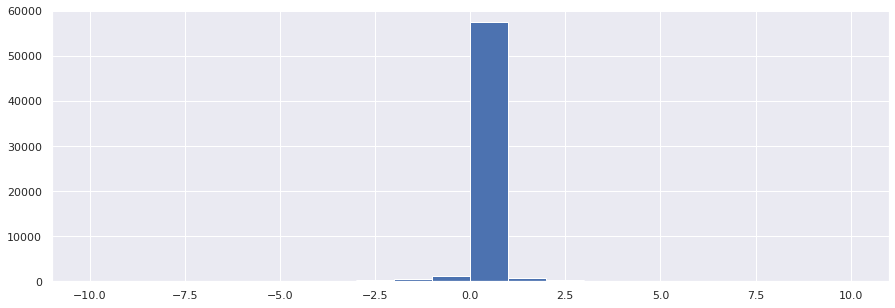

In [68]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.11 "9000233" 강우관측소

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

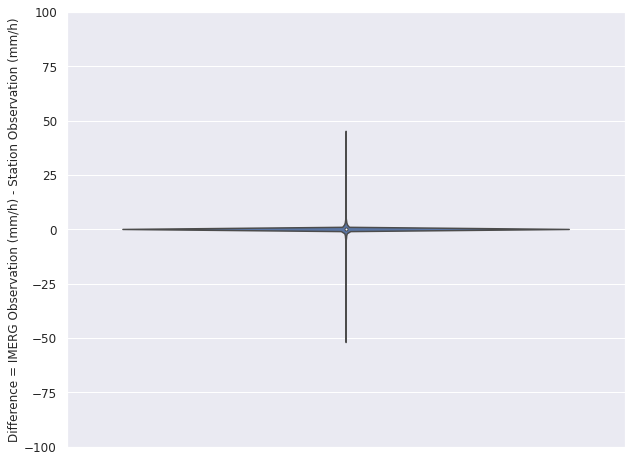

In [69]:
st_code = obs_gpm_diff_df.columns[10]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [70]:
bins = list(range(-60, 50, 10))
bins

[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]

In [71]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-60.001, -50.0]        2
 (-50.0, -40.0]          0
 (-40.0, -30.0]          6
 (-30.0, -20.0]         18
 (-20.0, -10.0]         83
 (-10.0, 0.0]        55672
 (0.0, 10.0]          5530
 (10.0, 20.0]           51
 (20.0, 30.0]            4
 (30.0, 40.0]            1
 Name: 9000233_diff, dtype: int64,
 (-60.001, -50.0]    0.000033
 (-50.0, -40.0]      0.000000
 (-40.0, -30.0]      0.000098
 (-30.0, -20.0]      0.000293
 (-20.0, -10.0]      0.001352
 (-10.0, 0.0]        0.907183
 (0.0, 10.0]         0.090112
 (10.0, 20.0]        0.000831
 (20.0, 30.0]        0.000065
 (30.0, 40.0]        0.000016
 Name: 9000233_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [72]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [73]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       24
 (-9.0, -8.0]          21
 (-8.0, -7.0]          36
 (-7.0, -6.0]          42
 (-6.0, -5.0]          58
 (-5.0, -4.0]          97
 (-4.0, -3.0]         152
 (-3.0, -2.0]         261
 (-2.0, -1.0]         943
 (-1.0, 0.0]        54040
 (0.0, 1.0]          4009
 (1.0, 2.0]           740
 (2.0, 3.0]           333
 (3.0, 4.0]           199
 (4.0, 5.0]            99
 (5.0, 6.0]            51
 (6.0, 7.0]            30
 (7.0, 8.0]            32
 (8.0, 9.0]            25
 (9.0, 10.0]           12
 Name: 9000233_diff, dtype: int64,
 (-10.001, -9.0]    0.000391
 (-9.0, -8.0]       0.000342
 (-8.0, -7.0]       0.000587
 (-7.0, -6.0]       0.000684
 (-6.0, -5.0]       0.000945
 (-5.0, -4.0]       0.001581
 (-4.0, -3.0]       0.002477
 (-3.0, -2.0]       0.004253
 (-2.0, -1.0]       0.015366
 (-1.0, 0.0]        0.880589
 (0.0, 1.0]         0.065327
 (1.0, 2.0]         0.012058
 (2.0, 3.0]         0.005426
 (3.0, 4.0]         0.003243
 (4.0, 5.0]         0.001613
 (5.0, 6.0

<AxesSubplot:>

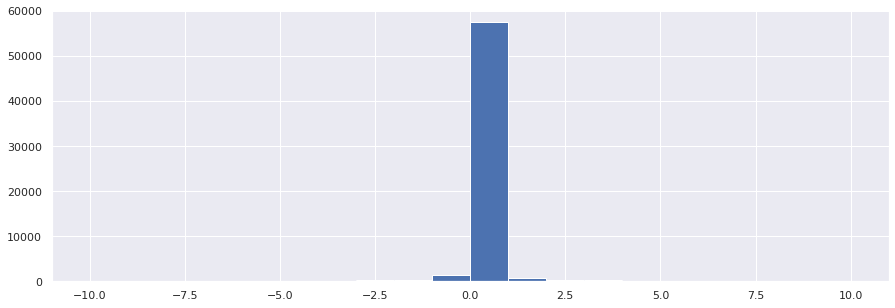

In [74]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))

### 2.12 "9000234" 강우관측소

#### Violin Plot을 활용하여 [GPM관측 데이터 - 지상관측] 데이터의 분포특성 (Min, Max, 분포 등) 분석

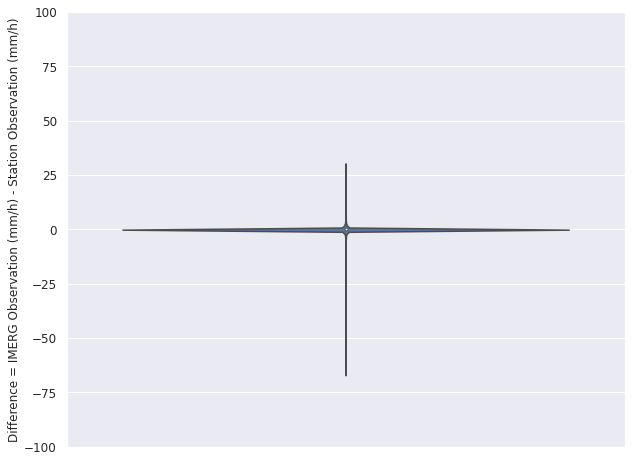

In [75]:
st_code = obs_gpm_diff_df.columns[11]
sns.violinplot(y=obs_gpm_diff_df[st_code])
plt.ylim(-100, 100)
plt.yticks(fontsize=12)
plt.ylabel('Difference = IMERG Observation (mm/h) - Station Observation (mm/h)', fontsize=12)
plt.show()

#### 데이터 차이의 Min ~ Max를 고려하여 데이터로 분포 파악

In [76]:
bins = list(range(-70, 50, 10))
bins

[-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]

In [77]:
obs_gpm_diff_df[st_code].value_counts(bins=bins).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins, normalize=True).sort_index()

((-70.001, -60.0]        3
 (-60.0, -50.0]          0
 (-50.0, -40.0]          4
 (-40.0, -30.0]          4
 (-30.0, -20.0]         17
 (-20.0, -10.0]         81
 (-10.0, 0.0]        55654
 (0.0, 10.0]          5548
 (10.0, 20.0]           51
 (20.0, 30.0]            5
 (30.0, 40.0]            1
 Name: 9000234_diff, dtype: int64,
 (-70.001, -60.0]    0.000049
 (-60.0, -50.0]      0.000000
 (-50.0, -40.0]      0.000065
 (-40.0, -30.0]      0.000065
 (-30.0, -20.0]      0.000277
 (-20.0, -10.0]      0.001320
 (-10.0, 0.0]        0.906890
 (0.0, 10.0]         0.090405
 (10.0, 20.0]        0.000831
 (20.0, 30.0]        0.000081
 (30.0, 40.0]        0.000016
 Name: 9000234_diff, dtype: float64)

#### 데이터 주로 분포하고 있는 -10~10사이의 분포 파악

In [78]:
bins_detail = list(range(-10, 11, 1))
bins_detail

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [79]:
obs_gpm_diff_df[st_code].value_counts(bins=bins_detail).sort_index(), obs_gpm_diff_df[st_code].value_counts(bins=bins_detail, normalize=True).sort_index()

((-10.001, -9.0]       20
 (-9.0, -8.0]          25
 (-8.0, -7.0]          26
 (-7.0, -6.0]          44
 (-6.0, -5.0]          56
 (-5.0, -4.0]          86
 (-4.0, -3.0]         130
 (-3.0, -2.0]         264
 (-2.0, -1.0]         796
 (-1.0, 0.0]        54212
 (0.0, 1.0]          3998
 (1.0, 2.0]           748
 (2.0, 3.0]           337
 (3.0, 4.0]           183
 (4.0, 5.0]            93
 (5.0, 6.0]            60
 (6.0, 7.0]            55
 (7.0, 8.0]            31
 (8.0, 9.0]            25
 (9.0, 10.0]           18
 Name: 9000234_diff, dtype: int64,
 (-10.001, -9.0]    0.000326
 (-9.0, -8.0]       0.000407
 (-8.0, -7.0]       0.000424
 (-7.0, -6.0]       0.000717
 (-6.0, -5.0]       0.000913
 (-5.0, -4.0]       0.001401
 (-4.0, -3.0]       0.002118
 (-3.0, -2.0]       0.004302
 (-2.0, -1.0]       0.012971
 (-1.0, 0.0]        0.883392
 (0.0, 1.0]         0.065148
 (1.0, 2.0]         0.012189
 (2.0, 3.0]         0.005491
 (3.0, 4.0]         0.002982
 (4.0, 5.0]         0.001515
 (5.0, 6.0

<AxesSubplot:>

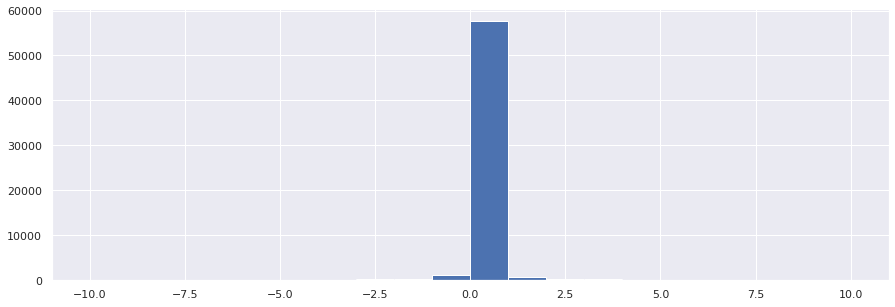

In [80]:
obs_gpm_diff_df[st_code].hist(bins=bins_detail, figsize=(15,5))